# Interactive LDA

## Experiments
1. Obtain $p(d|z)$ by using the Bayes Rule on $\theta_d$.
2. Then compare the entropy of $\beta_k$ with the change in the entropy/variance of $p(d|z)$.

In [68]:
from __future__ import print_function
from time import time

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy as s_entropy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [75]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    top_words=[]
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        top_words.append(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    return top_words


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
top_words = print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 9.037s.
Extracting tf features for LDA...
done in 2.363s.
Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 17.197s.

Topics in LDA model:
Topic #0:
edu com mail send graphics ftp pub available contact university list faq ca information cs 1993 program sun uk mit
Topic #1:
don like just know think ve way use right good going make sure ll point got need really time doesn
Topic #2:
christian think atheism faith pittsburgh new bible radio games alt lot just religion like book read play time subject believe
Topic #3:
drive disk windows thanks use card drives hard version pc software file using scsi help does new dos controller 16
Topic #4:
hiv health aids disease april medical care research 1993 light information study national service test led 10 page new drug
Topic #5:
god people does just good don jesus say israel way life know true fact time law want believe make think
Topic #6:
55 10 11 18 15 team game 19 period play 23 12 13

In [76]:
theta = lda.transform(tf)

## Theta turns out to be unnormalized in this implementation.
$\theta_d$ are unnormalized densities. We are interested in $p(d|z)=\frac{p(d,z)}{p(z)}$. 

We know that,
$p(z)=\sum_d p(d,z)$ and $p(d,z)=\theta$.

In [77]:
p_z=np.sum(theta,axis=0)
p_d_z=theta/p_z

# Plots
* We are interested in relating how the entropy of $p(d|z)$ relates to the generality of topic $z$.
* Below, for each of the 10 topics we plot their distribution over the documents $p(D|z)$. The entropy of this distribution and the corresponding topic distribution is mentioned in the title. The actual topic vector is also provided at the bottom of each plot.

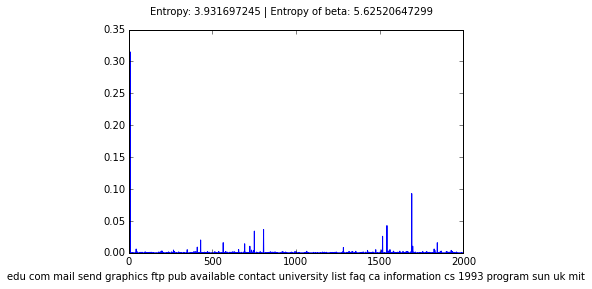

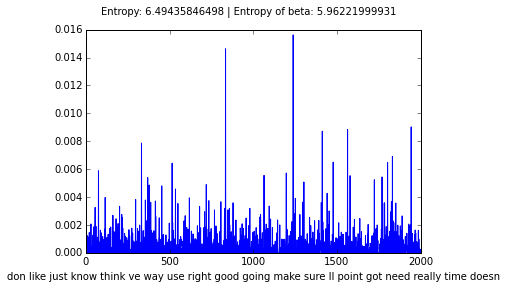

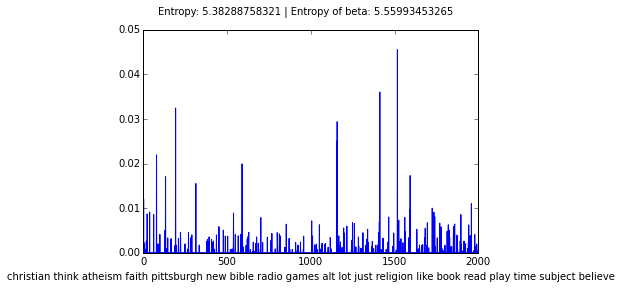

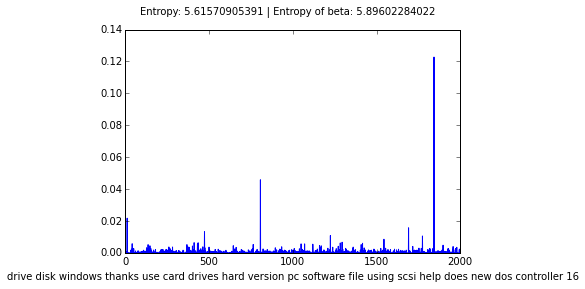

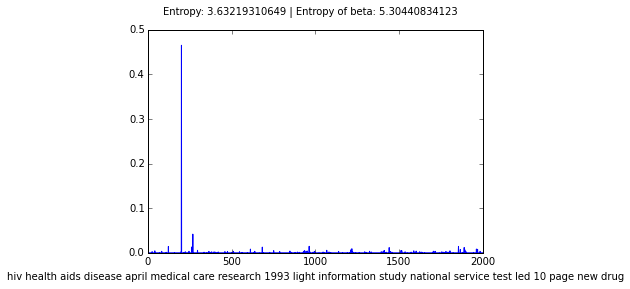

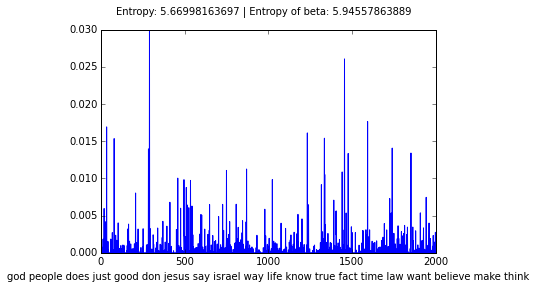

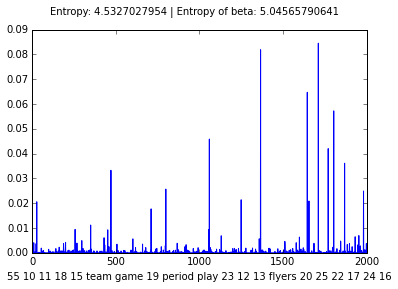

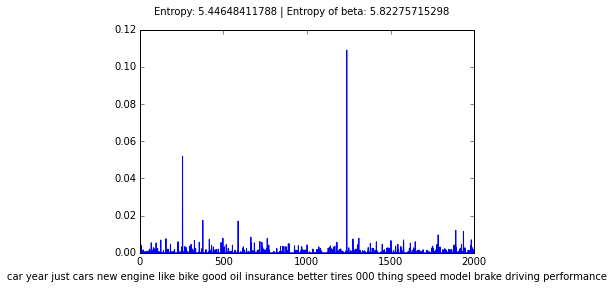

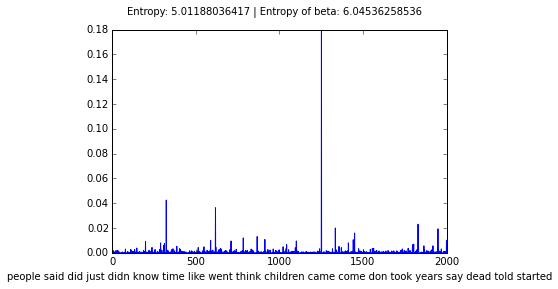

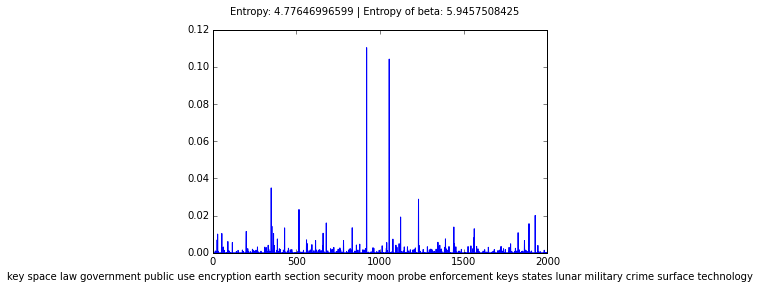

In [79]:
for ind,i in enumerate(p_d_z.T):
    f=plt.figure()
    plt.plot(i)
    title='Entropy: '+str(s_entropy(i))+' | Entropy of beta: '+str(s_entropy(lda.components_[ind]))
    f.suptitle(title)
    plt.xlabel(top_words[ind])